<a href="https://colab.research.google.com/github/davidklhui/stochastic-modelling/blob/main/Slot_game_design_4x4_game_design.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**author**: David, K.L. Hui

This project will demonstrate the design of a new slot game: a 4 rows x 4 reels slot game, and perform simulation and programming of this game.

This is an extension of the previous project: **Stochastic Simulations - Spin Poker**

# Section 1: Introduction

In the previous project, we explored a simple 1-row x 5-reels slot game: **spin poker**. We have discussed the simulation method, programming, and suggested a method to find the optimal reward (payout) allocation strategy.

In this project, we will design a more realistic game. As we have discussed much potential problems before, we will explore different things faster

## Game Layout

Suppose the game is like, a mouse 🐁 on the leftmost wishes to get fruits and cheeses. For each game, there will be a generated path. And there are different symbols for each reel. Some are 'fruits' 🍎🍋🥝
, some are 'cheese' 🧀, and some are 'mouse traps'🪤.

<br/>

<table>
  <tbody>
    <tr>
      <td bgcolor='grey'>🍋</td><td>🍋</td><td>🧀</td><td>🪤</td>
    </tr>
    <tr>
      <td>🧀</td><td bgcolor='grey'>🍎</td><td>🪤</td><td>🪤</td>
    </tr>
    <tr>
      <td>🪤</td><td>🥝</td><td bgcolor='grey'>🍎</td><td bgcolor='grey'>🪤</td>
    </tr>
    <tr>
      <td>🍋</td><td>🍎</td><td>🥝</td><td>🧀</td>
    </tr>
  </tbody>
</table>

<br/>

emojis are copied from [emojipedia](https://emojipedia.org/about)

## Game Rule

For each game, there will be a generated path, so the mouse can go along the path. The mouse can eat as much as it can until it reaches a mouse trap.

Each eaten food is worth a reward (payout). If the mouse eats consecutive food of the same kind, the second food is worth higher rewards.




Example 1:

e.g. Before the spin, the path is selected (marked the grey background). Then after spinning, symbols are as follows:

<table>
  <tbody>
    <tr>
      <td bgcolor='grey'>🍋</td><td>🍋</td><td>🧀</td><td>🪤</td>
    </tr>
    <tr>
      <td>🧀</td><td bgcolor='grey'>🍎</td><td>🪤</td><td>🪤</td>
    </tr>
    <tr>
      <td>🪤</td><td>🍎</td><td bgcolor='grey'>🍎</td><td bgcolor='grey'>🧀</td>
    </tr>
    <tr>
      <td>🍋</td><td>🥝</td><td>🪤</td><td>🧀</td>
    </tr>
  </tbody>
</table>

So the mouse can get: 1 lemon, 1 apple, 1 apple (with extra rewards because it is in consecutive), and a cheese



Example 2:

<table>
  <tbody>
    <tr>
      <td>🍋</td><td bgcolor='grey'>🥝</td><td bgcolor='grey'>🧀</td><td>🪤</td>
    </tr>
    <tr>
      <td bgcolor='grey'>🧀</td><td>🍎</td><td>🪤</td><td bgcolor='grey'>🪤</td>
    </tr>
    <tr>
      <td>🪤</td><td>🥝</td><td>🍎</td><td>🪤</td>
    </tr>
    <tr>
      <td>🍋</td><td>🍎</td><td>🪤</td><td>🧀</td>
    </tr>
  </tbody>
</table>

So the mouse can get: 1 cheese, 1 kiwi-fruit, 1 cheese again (but no extra rewards because it is not consecutive), and end (encountered mouse trap)

Example 3:

<table>
  <tbody>
    <tr>
      <td>🍋</td><td>🍋</td><td>🧀</td><td>🪤</td>
    </tr>
    <tr>
      <td bgcolor='grey'>🧀</td><td>🍎</td><td bgcolor='grey'>🪤</td><td bgcolor='grey'>🪤</td>
    </tr>
    <tr>
      <td>🪤</td><td bgcolor='grey'>🍎</td><td>🍎</td><td>🪤</td>
    </tr>
    <tr>
      <td>🥝</td><td>🥝</td><td>🪤</td><td>🧀</td>
    </tr>
  </tbody>
</table>

So the mouse can get: 1 cheese, 1 apple, and end (encountered mouse trap)

Example 4:

<table>
  <tbody>
    <tr>
      <td>🍋</td><td bgcolor='grey'>🍋</td><td bgcolor='grey'>🧀</td><td>🪤</td>
    </tr>
    <tr>
      <td bgcolor='grey'>🪤</td><td>🍎</td><td>🪤</td><td bgcolor='grey'>🪤</td>
    </tr>
    <tr>
      <td>🪤</td><td>🥝</td><td>🥝</td><td>🪤</td>
    </tr>
    <tr>
      <td>🍋</td><td>🍎</td><td>🪤</td><td>🧀</td>
    </tr>
  </tbody>
</table>

So the mouse gets nothing because it encountered the trap at the beginning

It is obvious that, the 'path' looks just a gimmick. The generated path doesn't change the probability of rewards, that just a gimmick. However, the crucial matter is the position of the of cheese trap. The higher chance of occurring on the left reel, the higher probability of getting low reward.

# Section 2: Probability and Simulation

This section will perform simple programming, and estimate the probability under large sample.


In [8]:
import pandas as pd

# define symbols
class Symbol():
  def __init__(self, name, icon):
    self.name = name
    self.icon = icon

  def __repr__(self):
    return self.icon

apple = Symbol(name='apple', icon='🍎')

lemon = Symbol(name='lemon', icon='🍋')

# for short, refer kiwi as kiwi fruit
kiwi = Symbol(name='kiwi', icon='🥝')

cheese = Symbol(name='cheese', icon='🧀')

trap = Symbol(name='trap', icon='🪤')

apple, lemon, kiwi, cheese, trap

(🍎, 🍋, 🥝, 🧀, 🪤)

In [89]:
import numpy as np

# define a reel class
class Reel():
  def __init__(self, symbols, probs):
    if len(symbols) != len(probs):
      raise Exception(f"length of symbols should be the same as probs, len(symbols)={len(symbols)}, len(probs)={len(probs)}")
    self.symbols = symbols
    self.probs = probs

  def sim(self):
    return np.random.choice(a=self.symbols, size=4, p=self.probs, replace=True)

symbols = [apple, lemon, kiwi, cheese, trap]
probs = [0.2, 0.2, 0.2, 0.1, 0.3]
reel0 = Reel(symbols, probs)

# give a 1d array of simulated outcomes of reel 0
reel0.sim()

array([🧀, 🥝, 🥝, 🪤], dtype=object)

In [176]:
import typing # to force type safe

# define a slot machine
class Slot_Machine():

  max_rows = 4
  max_reels = 4

  def __init__(self, reels: typing.List[Reel]):
    if len(reels) != self.max_reels:
      raise Exception(f"Should pass a list of size 4 Reels")

    self.reels = reels

  # simulate a single outcome, it will be a 4x4 array
  def sim(self):
    return [reel.sim() for reel in self.reels]

  # simulate multiple results, it will be a Nx4x4 array
  def sim_N(self, N):

    return [self.sim() for i in range(N)]

  # simulate a generated path
  # possible positions are [0,1,2,3]
  # note that the first position can be any from [0,1,2,3]
  # next position depends on the previous:
  #   if last position is 0 (min) -> next can only be 0,1
  #   if last position is 3 (max) -> next can only be 2,3
  #   otherwise: 1 -> 0,1,2; 2 -> 1,2,3
  def gen_path_position(self, possible_positions, last_position):
    if last_position == 0:
      return np.random.choice(a=[0,1], size=1)[0]
    elif last_position == np.max(possible_positions):
      return np.random.choice(a=[last_position-1, last_position], size=1)[0]
    else:
      return np.random.choice(a=[last_position-1, last_position, last_position+1], size=1)[0]

  # simulate a single path, it will be a 1x4 array
  def gen_path(self):
    possible_positions = list(range(self.max_rows))
    pos0 = np.random.choice(a=possible_positions, size=1)[0]
    pos1 = self.gen_path_position(possible_positions, pos0)
    pos2 = self.gen_path_position(possible_positions, pos1)
    pos3 = self.gen_path_position(possible_positions, pos2)

    return [pos0, pos1, pos2, pos3]

  # simulate multiple paths, it will be a Nx4 array
  def gen_path_N(self, N):
    return [self.gen_path() for i in range(N)]

In [178]:
reels = [Reel(symbols, probs) for i in range(4)]
reels

slot_machine = Slot_Machine(reels)
slot_machine.sim()

[array([🍋, 🪤, 🍎, 🥝], dtype=object),
 array([🍋, 🥝, 🧀, 🍋], dtype=object),
 array([🪤, 🪤, 🍎, 🍎], dtype=object),
 array([🧀, 🍋, 🧀, 🥝], dtype=object)]

In [179]:
simN = slot_machine.sim_N(2)
simN

[[array([🍋, 🍎, 🪤, 🧀], dtype=object),
  array([🍋, 🥝, 🍋, 🥝], dtype=object),
  array([🪤, 🍎, 🪤, 🍎], dtype=object),
  array([🥝, 🍎, 🪤, 🍋], dtype=object)],
 [array([🍎, 🥝, 🍋, 🪤], dtype=object),
  array([🍎, 🪤, 🧀, 🍎], dtype=object),
  array([🍎, 🥝, 🧀, 🪤], dtype=object),
  array([🍋, 🪤, 🍋, 🪤], dtype=object)]]

In [180]:
simN[0]

[array([🍋, 🍎, 🪤, 🧀], dtype=object),
 array([🍋, 🥝, 🍋, 🥝], dtype=object),
 array([🪤, 🍎, 🪤, 🍎], dtype=object),
 array([🥝, 🍎, 🪤, 🍋], dtype=object)]

In [182]:
# note that above generated "outcome" is different from what should be displayed in the screen. The first reel is
simN[0][0]

# these 4 symbols are the symbols of the first reel from top to bottom

array([🍋, 🍎, 🪤, 🧀], dtype=object)

In [162]:
# note that the index is 0-based
# so if the value is 1, then it means the 2nd row
# e.g. if it is [3,2,1,1]: means from 4th row -> 3rd row -> 2nd row -> 2nd row
slot_machine.gen_path()

[2, 2, 3, 2]

## Simulate possible outcomes

We should suspect that
1. the generated path should have no effects on the probability of outcomes (i.e. independent)
2. the probability of a particular outcome, is just the product of probability of individual symbol

We simulate a large number of raw outcomes and paths, to see what are the possible symbols array. And they compare this to our though

In [195]:
# first take a look at smaller size


sim_size = 5


raw_outcomes = slot_machine.sim_N(sim_size)
paths = slot_machine.gen_path_N(sim_size)

for i in range(sim_size):
  raw_outcome = raw_outcomes[i]
  path = paths[i]

  print(f"raw_outcome={raw_outcome}")
  print(f"path={path}")
  outcome = [raw_outcome[position][path[position]] for position in range(len(path))]
  print(f"outcome={outcome}")

  print("\n")



raw_outcome=[array([🪤, 🍎, 🍋, 🍋], dtype=object), array([🍎, 🧀, 🥝, 🍋], dtype=object), array([🥝, 🪤, 🍎, 🥝], dtype=object), array([🍎, 🪤, 🧀, 🪤], dtype=object)]
path=[1, 1, 1, 0]
outcome=[🍎, 🧀, 🪤, 🍎]


raw_outcome=[array([🪤, 🧀, 🥝, 🍎], dtype=object), array([🪤, 🥝, 🧀, 🪤], dtype=object), array([🍋, 🍋, 🍎, 🍎], dtype=object), array([🍋, 🍎, 🍋, 🪤], dtype=object)]
path=[1, 2, 2, 2]
outcome=[🧀, 🧀, 🍎, 🍋]


raw_outcome=[array([🥝, 🥝, 🪤, 🪤], dtype=object), array([🧀, 🍋, 🍎, 🥝], dtype=object), array([🪤, 🍎, 🥝, 🪤], dtype=object), array([🪤, 🪤, 🍋, 🥝], dtype=object)]
path=[1, 0, 1, 0]
outcome=[🥝, 🧀, 🍎, 🪤]


raw_outcome=[array([🪤, 🍋, 🪤, 🥝], dtype=object), array([🥝, 🪤, 🪤, 🍋], dtype=object), array([🍋, 🍎, 🪤, 🪤], dtype=object), array([🪤, 🪤, 🥝, 🍋], dtype=object)]
path=[1, 0, 1, 1]
outcome=[🍋, 🥝, 🍎, 🪤]


raw_outcome=[array([🪤, 🍎, 🧀, 🥝], dtype=object), array([🪤, 🥝, 🧀, 🍎], dtype=object), array([🍋, 🥝, 🍋, 🍎], dtype=object), array([🥝, 🍋, 🪤, 🍎], dtype=object)]
path=[0, 1, 0, 1]
outcome=[🪤, 🥝, 🍋, 🍋]




In [254]:
# again, using parallel computation

from concurrent.futures import ProcessPoolExecutor
import os
import time


In [313]:

# define as a function


def sim_outcomes(j, total_batches, sim_size):
  if j % 1000 == 0:
    print(f"batch={j}/{total_batches}, sim_size={sim_size}")

  seed = np.random.RandomState().randint(0,os.getpid(),size=1)
  np.random.seed(seed)

  # initialize the results
  results = [None] * sim_size

  raw_outcomes = slot_machine.sim_N(sim_size)
  paths = slot_machine.gen_path_N(sim_size)

  for i in range(sim_size):

    raw_outcome = raw_outcomes[i]
    path = paths[i]

    outcome = [raw_outcome[position][path[position]] for position in range(len(path))]

    results[i] = outcome

  return results


# N must be multiple of 8
def parallel_sim_outcomes(N, batch_size):

  # Record the start time
  start_time = time.time()

  with ProcessPoolExecutor(max_workers=8) as executor:

    total_batches = int(N/batch_size)

    outcomes = []
    for i in range(total_batches):
      future = executor.submit(sim_outcomes, i, total_batches, batch_size)
      outcomes.extend(future.result())

    outcomes_df = pd.DataFrame(outcomes)

  # Record the end time
  end_time = time.time()

  # Calculate the execution time
  execution_time = end_time - start_time

  print(f"Execution Time: {execution_time} seconds")

  return outcomes_df







The above are the possible outcomes for 10 simulations. Rows are the outcome of each simulation; columns are the symbol at each reel.

Next, we will use larger sample size, and find the occurrence

In [382]:
N = 5000000

outcomes_df = parallel_sim_outcomes(N, batch_size=100)

batch=0/50000, sim_size=100
batch=1000/50000, sim_size=100
batch=2000/50000, sim_size=100
batch=3000/50000, sim_size=100
batch=4000/50000, sim_size=100
batch=5000/50000, sim_size=100
batch=6000/50000, sim_size=100
batch=7000/50000, sim_size=100
batch=8000/50000, sim_size=100
batch=9000/50000, sim_size=100
batch=10000/50000, sim_size=100
batch=11000/50000, sim_size=100
batch=12000/50000, sim_size=100
batch=13000/50000, sim_size=100
batch=14000/50000, sim_size=100
batch=15000/50000, sim_size=100
batch=16000/50000, sim_size=100
batch=17000/50000, sim_size=100
batch=18000/50000, sim_size=100
batch=19000/50000, sim_size=100
batch=20000/50000, sim_size=100
batch=21000/50000, sim_size=100
batch=22000/50000, sim_size=100
batch=23000/50000, sim_size=100
batch=24000/50000, sim_size=100
batch=25000/50000, sim_size=100
batch=26000/50000, sim_size=100
batch=27000/50000, sim_size=100
batch=28000/50000, sim_size=100
batch=29000/50000, sim_size=100
batch=30000/50000, sim_size=100
batch=31000/50000, si

In [383]:
outcomes_df.shape

(5000000, 4)

In [384]:
outcomes_df.head()
outcomes_df.columns = ['R0', 'R1', 'R2', 'R3']

outcomes_df

,R0,R1,R2,R3
0,🪤,🪤,🪤,🍎
1,🪤,🧀,🍋,🧀
2,🍎,🍋,🍎,🍋
3,🥝,🥝,🥝,🪤
4,🥝,🪤,🥝,🍎
...,...,...,...,...
4999995,🥝,🥝,🥝,🥝
4999996,🪤,🧀,🧀,🥝
4999997,🪤,🍎,🪤,🥝
4999998,🍋,🪤,🪤,🍋


In [385]:
outcomes_count_df = outcomes_df.applymap((lambda cell: cell.name)).groupby(["R0","R1","R2","R3"]).size().reset_index(name='Count')
outcomes_count_df['Prob'] = outcomes_count_df.apply(lambda row: row['Count'] / N, axis=1)
outcomes_count_df = outcomes_count_df.sort_values(by='Prob')

In [386]:
pd.set_option('display.float_format', '{:.9f}'.format)


outcomes_count_df

,R0,R1,R2,R3,Count,Prob
156,cheese,cheese,cheese,cheese,523,0.000104600
206,cheese,lemon,cheese,cheese,934,0.000186800
166,cheese,cheese,lemon,cheese,940,0.000188000
157,cheese,cheese,cheese,kiwi,949,0.000189800
406,lemon,cheese,cheese,cheese,970,0.000194000
...,...,...,...,...,...,...
124,apple,trap,trap,trap,27176,0.005435200
374,kiwi,trap,trap,trap,27214,0.005442800
604,trap,trap,apple,trap,27214,0.005442800
623,trap,trap,trap,lemon,27400,0.005480000


In [387]:
probs

[0.2, 0.2, 0.2, 0.1, 0.3]

In [388]:
probs[3]**3  *  probs[0] * N

1000.0000000000003

Confirmed that they are approximately the same, so this time, in our programming section, we shall ignore the simulation part, as directly use the true probability calculation

## Calculate the reward

In this design, the mouse can eat as much food as it can reach until a trap. And, if the mouse eat consecutive kind of food, the reward will be more (let say, x2, x3, x40)

In [446]:
# we need the plain reward for apple. lemon, kiwi fruit, and cheese
# no reward for trap

# supply row as the pandas series
def reward(row, fruit_reward, cheese_reward):
  value = 0
  last_symbol = None
  last_counter = 0

  # print(row.to_numpy())
  for cell in row.to_numpy():
    if cell=='trap':
      break;
    else:
      temp = cheese_reward if cell=='cheese' else fruit_reward

      if last_symbol is None:
        last_symbol = cell

      if last_symbol == cell:
        # print(f"matched: {cell}, temp={temp}")
        match last_counter:
          case 0:
            value += temp * 1
            last_counter += 1
          case 1:
            value += temp * 2
            last_counter += 1
          case 2:
            value += temp * 3
            last_counter += 1
          case 3:
            value += temp * 40
            last_counter += 1
          case _:
            pass
      else:
        # print(f"setting from {last_symbol} -> {cell}")
        last_symbol = cell
        last_counter = 1
        value += temp


  return value



In [447]:
temp_df = outcomes_count_df.head(5).copy()

temp_df['reward'] = temp_df.apply(lambda row: reward(row[:4], 1, 10), axis=1)

In [448]:
temp_df

,R0,R1,R2,R3,Count,Prob,reward
156,cheese,cheese,cheese,cheese,523,0.000104600,460
206,cheese,lemon,cheese,cheese,934,0.000186800,41
166,cheese,cheese,lemon,cheese,940,0.000188000,41
157,cheese,cheese,cheese,kiwi,949,0.000189800,61
406,lemon,cheese,cheese,cheese,970,0.000194000,61


In [449]:
# cheese -> cheese -> cheese -> cheese
10 + 10*2 + 10*3 + 10*40

460

In [450]:
# cheese -> lemon -> cheese -> cheese
10 + 1 + 10 + 10*2

41

In [451]:
# cheese -> cheese -> cheese -> kiwi
10 + 10 * 2 + 10 * 3 + 1

61

In [454]:
temp2_df = outcomes_count_df.copy()

temp2_df['reward'] = temp2_df.apply(lambda row: reward(row[:4], 1, 10), axis=1)

temp2_df

,R0,R1,R2,R3,Count,Prob,reward
156,cheese,cheese,cheese,cheese,523,0.000104600,460
206,cheese,lemon,cheese,cheese,934,0.000186800,41
166,cheese,cheese,lemon,cheese,940,0.000188000,41
157,cheese,cheese,cheese,kiwi,949,0.000189800,61
406,lemon,cheese,cheese,cheese,970,0.000194000,61
...,...,...,...,...,...,...,...
124,apple,trap,trap,trap,27176,0.005435200,1
374,kiwi,trap,trap,trap,27214,0.005442800,1
604,trap,trap,apple,trap,27214,0.005442800,0
623,trap,trap,trap,lemon,27400,0.005480000,0


array([[<Axes: title={'center': 'reward'}>]], dtype=object)

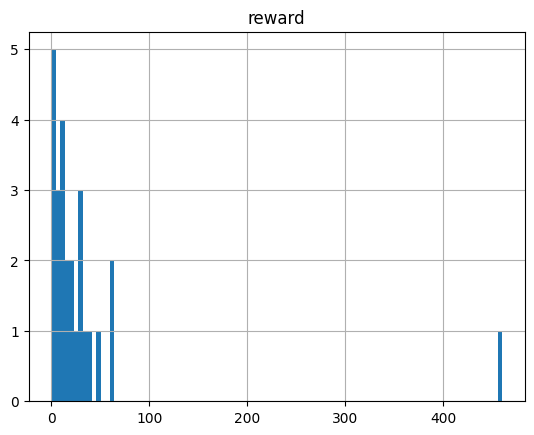

In [466]:
# see the distribution of this Rewards configuration

temp2_df.groupby('reward').size().reset_index(name='count').hist(column='reward', bins=100)

We can see that, under this reward settings, most of rewards will fall below 50, and only 1 will get more than 400




Next, we can try to perform our next analysis: what can we control, and how will it affect the rewards.

1. for each reel, the probability of occurrence of each symbol
2. the reward of individual symbol
3. multiplier strategy




